In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#def normalize(img):
#    M = np.zeros(img.shape)
#    for i in range(img.shape[0]):
#        for j in range(img.shape[1]):
#            M[i,j] = ((img[i,j] - img.min())/(img.max() - img.min()))
#    return M

def convolve(img, kernel):
    
    if kernel.shape[0] % 2 != 1 or kernel.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = img.shape[0]
    img_width = img.shape[1]
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(img.shape, dtype=np.float64)
    img = np.pad(img, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
            RegOfInt = img[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            g[i - pad_height, j - pad_width] = (RegOfInt*kernel).sum()

    if (g.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)
    return g

In [3]:
# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")

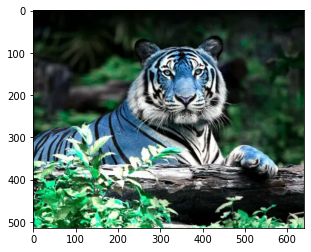

In [4]:
_img = cv2.imread("E:/Dataset/Tiger.jpg")
img = cv2.cvtColor(_img,cv2.COLOR_BGR2GRAY)

if _img is None:
    print('Invalid image...')
else:
    plt.imshow(_img)
    
img_gaussian = convolve(img, GAUSS)

In [5]:
dx = convolve(img_gaussian, SOBEL_X)
dy = convolve(img_gaussian, SOBEL_Y)

In [6]:
height = img.shape[0]
width = img.shape[1]
matrix_R = np.zeros((height,width))

dx2 = np.square(dx)
dy2 = np.square(dy)
dxy = dx*dy

In [7]:
k, threshold = 0.04, 0.15
offset = int( 5 / 2 )

print ("Finding Corners...")
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

        H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

        det = np.linalg.det(H)
        tr = np.matrix.trace(H)
        R = det - k*(tr**2)
        matrix_R[y-offset, x-offset] = R

Finding Corners...


In [8]:
cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        value = matrix_R[y, x]
        if value>threshold:
            cv2.circle(_img,(x,y),3,(0,255,0))

(-0.5, 639.5, 513.5, -0.5)

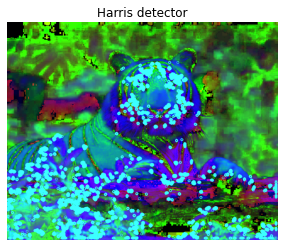

In [9]:
plt.imshow(cv2.cvtColor(_img, cv2.COLOR_BGR2HSV)), plt.title("Harris detector")
#plt.imshow(cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)), plt.title("Harris detector")
plt.axis('off')